In [1]:
import logging;
logging.basicConfig(filename='nlp_pre_processing_2.log',format='%(module)s||%(funcName)s||[%(process)d:%(thread)d||%(asctime)s||%(levelname)s||%(message)s', level=logging.DEBUG,
                    datefmt=logging.Formatter.default_time_format)
logging.info('Start ....>>');
#Utils.DATA_DIRS.index('construction')


In [296]:
import numpy as np
import pandas as pd
from lexnlp.extract.rcare.readutils import DataFrameUtils as Utils
import matplotlib.pyplot as plt
%matplotlib inline
target_names = Utils.DATA_DIRS
target_names
import lexnlp.nlp.en.tokens
NROWS = 20
TARGET_NAME = 'software_license'    
import gensim

In [297]:


def clean(feature, unique = False):
    #feature = eval(feature);
    #feature = Utils.clean_document(Utils.join_list (Utils.flatten(feature)))
    feature = Utils.clean_document(feature)
    feature = Utils.remove_stop_words(feature.lower())
    
    if(unique == False):
        #feature = Utils.join_list(list(lexnlp.nlp.en.tokens.get_nouns(feature)))
        feature = Utils.join_list(lexnlp.nlp.en.tokens.get_stem_list(feature))
        feature = Utils.join_list(lexnlp.nlp.en.tokens.get_lemma_list(feature))
        #result ['verbs'] = Utils.join_list(list(lexnlp.nlp.en.tokens.get_verbs(feature, lemmatize=True)))
        #result ['adjectives'] = Utils.join_list(list(lexnlp.nlp.en.tokens.get_adjectives(feature)))
        #result ['adverbs'] = Utils.join_list(list(lexnlp.nlp.en.tokens.get_adverbs(feature)))
        #logging.info(feature)
    else:
        feature = feature.upper();        
        feature = np.unique(np.array(feature. split(' ')))
        feature = Utils.join_list(feature, '*')
        if(feature == ""): feature = "*"
    return feature;

def comibine_fetures(row):
    features = [];
    #features.append(clean(data.conditions))
    #features.append(clean(data.constraints))
    #print (row['data'])
    features.append(clean(row['data']))
    #definitions = clean(data.definitions)
    #organizations = clean(data.organizations)
    #features.append( clean(data.nltk_companies,unique= True))
    #print (features)
    result = Utils.join_list(features, '^')
    return pd.Series({'feature': result, 'target': target_names.index(target_name), 'target_name': target_name});
    
for target_name in target_names:
    #target_name = 'software_license';
    if((target_name == TARGET_NAME or TARGET_NAME == None ) and (target_name.endswith(".txt") == False and target_name.endswith(".TXT") == False)):
        logging.info ('Processing %s', target_name)
        dir_path = Utils.DATA_PATH +  target_name + '/' 
        df = Utils.read_csv(path = dir_path, filename = '002.txt', nrows = NROWS);

        df = pd.concat([df, df.apply(comibine_fetures, axis = 1)], axis = 1)
        logging.info ('Wrting data %s', target_name)    
        df.to_csv(dir_path+ '003.txt',header = True, index  = False, doublequote = True, sep = '|', escapechar=' ');
        logging.info ('Done %s', target_name)
        
        

In [224]:
df_all = pd.DataFrame();

for target_name in target_names:
    if(target_name == TARGET_NAME or TARGET_NAME == None):    
        logging.info ('Processing %s', target_name)        
        if( target_name.endswith(".txt") or target_name.endswith(".TXT")  ):             
            pass
        else:
            dir_path = Utils.DATA_PATH +  target_name + '/' 
            print (dir_path)
            df_03 = Utils.read_csv(path = dir_path, filename = '003.txt', nrows = NROWS);
            logging.info ('concat %s', target_name)
            df_all = pd.concat([df_all,df_03])
            logging.info ('done %s', target_name)

#df_all.describe()
df = df_all.loc[df_all['target_name'] == TARGET_NAME ] if(TARGET_NAME != None) else df_all
#df.describe()
df.feature 

data/lexpredict-contraxsuite-samples/agreements/software_license/


0     amend five softwar licens agreement exhibit . ...
1     page exhibit . ambix system corp. softwar lice...
2     exhibit . softwar licens servic agreement soft...
3     sfgf k ex .htm softwar licens mainten agreemen...
4     page exhibit . softwar licens agreement softwa...
5     page exhibit . server softwar licens agreement...
6     object code softwar licens agreement agreement...
7     cere ex .htm exhibit . exclus softwar licens a...
8     page exhibit . confidenti softwar licens agree...
9     softwar licens agreement exhibit . execut copi...
10    page exhibit . softwar licens agreement softwa...
11    exhibir . exhibit . validian softwar licens ag...
12    u.s. softwar licens agreement u.s. softwar lic...
13    page softwar licens agreement softwar licens a...
14    form softwar licens agreement exhibit . form s...
15    exhibit . softwar licens royalti agreement sof...
16    softwar licens agreement agreement make enter ...
17    exhibit . amend restat ot ot gold softwar 

In [225]:
df_2 = Utils.read_csv(path = dir_path, filename = '003.txt', nrows = NROWS);

#feature = eval(df_2['nltk_companies'][4]);
#feature = Utils.clean_document(df_2['data'][4])
#print (Utils.clean_document(feature))
#feature = Utils.clean_document(Utils.join_list (Utils.flatten(feature)))
#feature = Utils.remove_stop_words(feature.lower())
    
#feature = Utils.join_list(list(lexnlp.nlp.en.tokens.get_nouns(feature)))
#feature = Utils.join_list(lexnlp.nlp.en.tokens.get_stem_list(feature))
#feature = Utils.join_list(lexnlp.nlp.en.tokens.get_lemma_list(feature))
#print (feature)
#print (np.unique(np.array(feature. split(' '))))
#list(set(feature. split(' ')))
df_2.head(3)

,data,name,address,amounts,citations,conditions,constraints,dates,definitions,durations,...,nltk_parties,nltk_persons,nltk_re_companies,organizations,regulation,stfd_persons,titles,feature,target,target_name
0,\n\n\n\n\n\n\nAmendment Five to Software Licen...,1139650_2004-08-09_AMENDMENT FIVE TO SOFTWARE ...,[],[],[],"[['unless', 'Section . shall be replaced in it...","[['within', 'problems must be fixed', ''], ['p...",[],"[['Amendment', 'Amendment Five to Software Lic...",[],...,"[('PRODUCTS', 'L.P.', None, 'Altiris Support O...",[],"[('between Altiris', 'Inc', None), ('Dell Prod...",[],[],[],[],amend five softwar licens agreement exhibit . ...,6,software_license
1,\n\n\n\n\n\n\n\n\n\n<PAGE>\n\nExhibit 99.5\n\n...,783233_1996-02-22_SOFTWARE LICENSE AGREEMENT D...,[],[],[],"[['subject to', '. DOCUMENTATION shall mean us...","[['after', 'a object code shall mean code whic...",[],"[['Ambix', 'PAGE Exhibit . AMBIX SYSTEMS CORP....",[],...,"[('AMBIX SYSTEMS', 'CORP', None, 'Customer'), ...",[],"[('AMBIX SYSTEMS', 'CORP', None), ('AMBIX SYST...",[],[],[],[],page exhibit . ambix system corp. softwar lice...,6,software_license
2,\n\n\n\n\n\n\n\n\n\n\n\nEXHIBIT 10.16\n\nSOFTW...,1092325_2000-03-23_SOFTWARE LICENSE AND SERVIC...,[],[],[],"[['when', 'The following attachments required'...","[['exceed', 'customer agrees not to', ''], ['b...",[],"[['BroadVision', 'EXHIBIT . SOFTWARE LICENSE A...",[],...,"[('BroadVision', 'Inc', None, ' follows for t...",[],"[('into as of this 11th day of November, 1999,...",[],[],[],[],exhibit . softwar licens servic agreement soft...,6,software_license


In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy;

In [228]:
vectorizer = TfidfVectorizer(max_df=0.6, 
                             max_features=None,
                             min_df=2, 
                             stop_words='english',
                             use_idf=True, 
                             norm  = 'l2', 
                             ngram_range=(1,2),                              
                            )
sparse_vector = vectorizer.fit_transform(df.feature  )
scaled = StandardScaler(copy = False).fit_transform(sparse_vector.toarray())
data_vector = pd.DataFrame(scaled)
#scaled = StandardScaler().fit_transform(sparse_vector.toarray())
#data_vector = pd.DataFrame(scaled)


X = data_vector.as_matrix()
print (X.shape)

#data_vector.describe()

(20, 5621)


In [229]:
#pd.DataFrame(X.toarray()).head(5)
#vectorizer

# reduce to 2 importants features
pca = PCA(.95)
#pca = PCA(n_components = 2)
#data_vector = pd.DataFrame(StandardScaler().fit_transform(data_vector))
X = pca.fit_transform(data_vector)
print (sum(pca.explained_variance_ratio_))
print (pca.n_components_)
# standardize these 2 new features
#min_max_scaler = StandardScaler()
#np_scaled = min_max_scaler.fit_transform(data_vector)
X = pd.DataFrame(X )
#X = scipy.sparse.csr_matrix(X.values)
X.describe()

0.9514088182035204
17


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01
mean,-1.423306e-14,1.911804e-14,-1.857403e-14,-2.104705e-14,-2.109424e-14,1.739719e-14,-3.219647e-16,-1.687539e-15,2.343681e-14,-1.394440e-14,1.620926e-14,1.683098e-14,2.575717e-15,-1.647571e-14,-3.774758e-15,8.348877e-15,1.083578e-14
std,2.194533e+01,2.148941e+01,2.109138e+01,1.963377e+01,1.916183e+01,1.903850e+01,1.886283e+01,1.861873e+01,1.837042e+01,1.806212e+01,1.770062e+01,1.738157e+01,1.696346e+01,1.575871e+01,1.454385e+01,1.448302e+01,1.367434e+01
min,-1.733168e+01,-5.008122e+01,-3.648760e+01,-2.599795e+01,-4.255627e+01,-2.971912e+01,-3.947389e+01,-3.449789e+01,-3.555425e+01,-4.041963e+01,-3.081766e+01,-1.690302e+01,-4.012325e+01,-3.331539e+01,-3.347348e+01,-3.232987e+01,-2.944763e+01
25%,-8.811981e+00,-7.930983e+00,-8.829080e+00,-1.008574e+01,-8.945469e+00,-1.323035e+01,-6.123081e+00,-4.869350e+00,-4.058620e+00,-3.784020e+00,-8.625255e+00,-7.918973e+00,-6.772653e+00,-8.926550e+00,-3.200908e+00,-4.306144e+00,-2.557491e+00
50%,-6.017232e+00,-2.757330e+00,-2.762668e+00,-1.392753e+00,-4.164659e+00,-2.532225e+00,8.545669e-01,5.347815e-01,-1.413649e+00,-9.916328e-01,1.081010e-01,-3.255164e+00,-1.431632e+00,1.444872e+00,-4.222348e-01,-2.081797e+00,-6.443502e-01
75%,-2.919057e+00,2.910457e+00,1.515892e+00,3.479207e+00,6.485809e+00,3.942452e+00,6.894146e+00,5.007938e+00,1.439916e+00,6.678959e+00,3.913460e+00,2.246861e+00,4.722870e+00,6.124909e+00,8.968555e-01,1.860419e+00,2.362765e+00
max,7.466480e+01,6.719855e+01,7.665301e+01,7.087978e+01,4.576034e+01,4.849958e+01,4.758212e+01,5.901294e+01,5.051226e+01,4.699979e+01,4.342861e+01,6.698129e+01,4.915845e+01,4.205778e+01,3.912770e+01,4.089479e+01,3.744583e+01


In [112]:
#km = KMeans(n_clusters=len(dataset.target_names), init='k-means++', max_iter=100, n_init=1,verbose=True)
#X
#data_vector#.describe()
#sparse_vector, vectorizer.get_feature_names()
data_vector.describe()

,0,1,2,3,4,5,6,7,8,9,...,5516,5517,5518,5519,5520,5521,5522,5523,5524,5525
count,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,...,25.000000,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,25.000000,25.000000,2.500000e+01,2.500000e+01,2.500000e+01
mean,-8.215650e-17,1.776357e-17,7.771561e-17,3.663736e-17,-1.776357e-17,5.329071e-17,4.662937e-17,2.220446e-18,1.110223e-17,3.552714e-17,...,0.000000,2.220446e-18,1.110223e-17,-2.886580e-17,-2.442491e-17,0.000000,0.000000,1.776357e-17,-4.551914e-17,-4.551914e-17
std,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,...,1.020621,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621,1.020621,1.020621e+00,1.020621e+00,1.020621e+00
min,-2.948732e-01,-3.660895e-01,-3.682482e-01,-2.162330e-01,-4.781093e-01,-4.353560e-01,-2.942834e-01,-2.948760e-01,-3.395245e-01,-4.023484e-01,...,-0.279830,-2.835930e-01,-2.937479e-01,-2.868584e-01,-3.964826e-01,-0.292712,-0.292712,-2.891333e-01,-2.209524e-01,-2.209524e-01
25%,-2.948732e-01,-3.660895e-01,-3.682482e-01,-2.162330e-01,-4.781093e-01,-4.353560e-01,-2.942834e-01,-2.948760e-01,-3.395245e-01,-4.023484e-01,...,-0.279830,-2.835930e-01,-2.937479e-01,-2.868584e-01,-3.964826e-01,-0.292712,-0.292712,-2.891333e-01,-2.209524e-01,-2.209524e-01
50%,-2.948732e-01,-3.660895e-01,-3.682482e-01,-2.162330e-01,-4.781093e-01,-4.353560e-01,-2.942834e-01,-2.948760e-01,-3.395245e-01,-4.023484e-01,...,-0.279830,-2.835930e-01,-2.937479e-01,-2.868584e-01,-3.964826e-01,-0.292712,-0.292712,-2.891333e-01,-2.209524e-01,-2.209524e-01
75%,-2.948732e-01,-3.660895e-01,-3.682482e-01,-2.162330e-01,2.581968e-01,-4.353560e-01,-2.942834e-01,-2.948760e-01,-3.395245e-01,-4.023484e-01,...,-0.279830,-2.835930e-01,-2.937479e-01,-2.868584e-01,-3.964826e-01,-0.292712,-0.292712,-2.891333e-01,-2.209524e-01,-2.209524e-01
max,3.421233e+00,3.217874e+00,2.921054e+00,4.890577e+00,4.075043e+00,2.440269e+00,3.609773e+00,3.416965e+00,4.088790e+00,3.297884e+00,...,4.333261,4.230293e+00,3.688136e+00,4.118100e+00,4.305897e+00,3.794492,3.794492,4.019855e+00,4.882348e+00,4.882348e+00


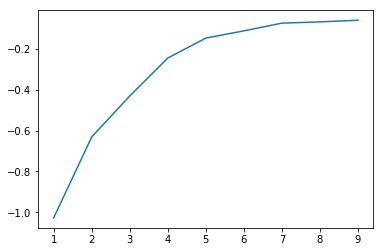

In [191]:
#X = data_vector.as_matrix()
kmeans_X = r[0]
n_cluster = range(1, 10)
kmeans = [KMeans(n_clusters=i, max_iter=1000, n_init=1,verbose=False).fit(kmeans_X) for i in n_cluster]
scores = [kmeans[i].score(kmeans_X) for i in range(len(kmeans))]
fig, ax = plt.subplots()
ax.plot(n_cluster, scores)
plt.show()
#kmeans



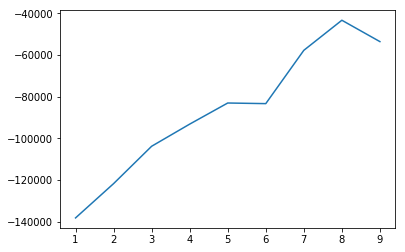

In [118]:
from sklearn.cluster import MiniBatchKMeans
X = data_vector.as_matrix()
n_cluster = range(1, 10)

miniBatches = [MiniBatchKMeans(n_clusters=i, init='k-means++', n_init=1, init_size=1000, batch_size=1000).fit(X) for i in n_cluster]
scores = [miniBatches[i].score(X) for i in range(len(miniBatches))]
fig, ax = plt.subplots()
ax.plot(n_cluster, scores)
plt.show()

In [194]:
kmeans_id = 8
kmeans_df = pd.DataFrame(df)
kmeans_df['cluster'] = kmeans[kmeans_id].predict(kmeans_X)
kmeans_df['0'] = kmeans_X[:, 0]
kmeans_df['1'] = kmeans_X[:, 1]
#df['cluster'].value_counts()
#kmeans_df['cluster'].value_counts()
#spx = pd.DataFrame(X)
#spx.rename(str, axis='columns', inplace = True)
#kmeans_df = kmeans_df.join(spx)

In [ ]:
kmeans_df.head(5)
#kmeans[kmeans_id].labels_

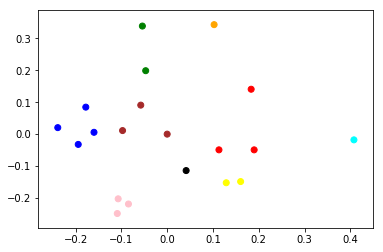

In [195]:
plot_df = kmeans_df #kmeans_df[kmeans_df['cluster'] == 1]
fig, ax = plt.subplots()
colors = {0:'red', 1:'blue', 2:'green', 3:'pink', 4:'black', 5:'orange', 6:'cyan', 7:'yellow', 
          8:'brown', 9:'purple', 10:'lightgrey', 11: 'grey', 12:'lightblue', 
          13:'lightgreen', 14: 'darkgrey'}

#from lexnlp.config.colors import colors
#a_colors = list(colors)
ax.scatter(plot_df['0'], plot_df['1'],  c =  kmeans_df["cluster"].apply(lambda x: colors[x])
          )
#ax.scatter(plot_df['2'], plot_df['3'], c =  kmeans_df["cluster"].apply(lambda x: colors[x]))
#ax.scatter(plot_df['4'], plot_df['5'], c =  kmeans_df["cluster"].apply(lambda x: colors[x]))
#ax.scatter(plot_df['6'], plot_df['7'], c =  kmeans_df["cluster"].apply(lambda x: colors[x]))
#ax.scatter(plot_df['8'], plot_df['9'], c =  kmeans_df["cluster"].apply(lambda x: colors[x]))
#ax.scatter(plot_df['10'], plot_df['11'], c =  kmeans_df["cluster"].apply(lambda x: colors[x]))
#plt.show()
#plot_df.plot('scatter')

In [ ]:
kmeans_df['cluster'].value_counts()

In [ ]:
kmeans_df[kmeans_df['cluster'] == 42].conditions[260]

In [ ]:
#from lexnlp.config.colors import colors
#x = list(colors)
#colors[x[0]]
#kmeans_df["color"] = kmeans_df["cluster"].apply(lambda x: colors[a_colors[x]])

In [ ]:
kmeans_df[kmeans_df['cluster'] == 41].conditions[134]

In [ ]:
kmeans_df[kmeans_df['cluster'] == 1]

In [255]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from sklearn import manifold
from time import time
from matplotlib import pyplot as plt
#from matplotlib.pyplot import spectral, nipy_spectral
color_list = plt.cm.Set3(np.linspace(0, 1, 25))

colors = {0:'red', 1:'blue', 2:'lightgrey', 3:'black', 4:'pink', 5:'orange', 6:'cyan', 7:'yellow', 
          8:'brown', 9:'purple', 10:'green', 11: 'grey', 12:'lightblue', 
          13:'lightgreen', 14: 'darkgrey', 15: 'red', 16: 'red', 17: 'lightblue', 18: 'red', 19: 'lightblue', 20: 'blue',
         21: 'lightblue', 22: 'lightblue', 23: 'lightblue', 24: 'lightblue', 25: 'lightblue'}



#X = data_vector.as_matrix()
#y = range(1, X.shape[0]  + 1)

#----------------------------------------------------------------------
# Visualize the clustering
def plot_clustering(X_red, X, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(20, 10))
    for i in range(X_red.shape[0]):
        #print (str(y[i]))
        plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),                
                 fontdict={'weight': 'bold', 'size': 20, 'color' : cmap[labels[i]] })

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout()
    
def plot_clustering_df(plot_df, label, color_lst = None):
    N = 25
    #area = (30 * np.random.rand(N))**2  # 0 to 15 point radii
    if(color_lst == None): 
        color_lst = color_list
    #plt.figure(figsize=(20, 10))
    fig, ax = plt.subplots()        
    ax.scatter(plot_df['0'], plot_df['1'], label= label, c =   plot_df["cluster"].apply(lambda x: color_lst[x]) )#,s=area, alpha=0.5
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    

In [265]:
def AggClustering(X, n_clusters = 5):  
    kneighbors_graph
    agg_result = {}
    #----------------------------------------------------------------------
    t0 = time()
    print("Computing embedding")
    X_red = manifold.SpectralEmbedding(n_components=2, n_jobs = 4).fit_transform(X)
    print("Done. %.2fs" %(time() - t0))
    knn_graph = kneighbors_graph(X_red, n_clusters, include_self=False)
    #X_red = X
    for linkage in ('ward', 'average', 'complete'):
        clustering = AgglomerativeClustering(linkage=linkage, connectivity = knn_graph, n_clusters=n_clusters)
        t0 = time()
        clustering.fit(X_red)
        print("%s : %.2fs" % (linkage, time() - t0))
        #print (X_red.shape[0],  clustering.labels_)
        agg_result[linkage] = (X_red, X, clustering.labels_)
        #plot_clustering(X_red, X, clustering.labels_, "%s linkage" % linkage)
    return agg_result;


In [262]:
#r = agg_result['average']
COLUMNS = ['0','1','cluster'];
def build_cluster_query(clusters):
    query = Utils.join_list(map(lambda x: '(cluster == '+ str(x) + ')' , clusters), ' or ' ); 
    print(query)
    return query;

def filter_df(df, query, columns = COLUMNS):
    df = pd.DataFrame(df.query(query)[columns].as_matrix())
    df.columns = columns
    return df;

def plot_clusters(df, clusters, columns = COLUMNS):
    query = build_cluster_query(clusters)
    plot_df = filter_df(df, query, columns)        
    cluster_counts = plot_df.cluster.value_counts()

    label = Utils.join_list(map(lambda x: str(x) + ' - ' + clusters[x] + '('+str(cluster_counts[x]) + ')', clusters), '; ')
    #print (label)

    plot_clustering_df(plot_df, label, clusters)
#plot_df["cluster"].apply(lambda x: plt.get_cmap(cmap[x]))
#plot_clustering (r[0], r[1], r[2], 'average')
#pd.DataFrame(plot_df.as_matrix())



Computing embedding
Done. 0.11s
ward : 0.00s
average : 0.00s
complete : 0.00s
1    6
0    4
3    3
4    2
2    2
7    1
6    1
5    1
Name: cluster, dtype: int64
(cluster == 0) or (cluster == 1) or (cluster == 2) or (cluster == 6) or (cluster == 4)


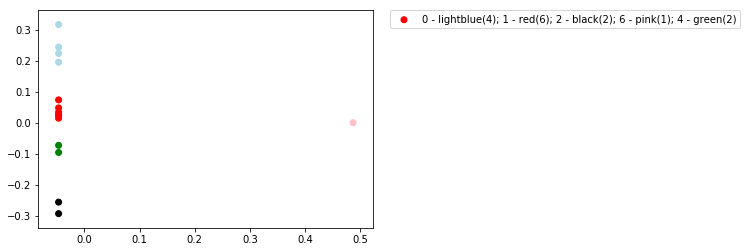

In [292]:
result = AggClustering(X.as_matrix(), 8)
r = result['ward']
df['0'] = r[0] [:, 0]
df['1'] = r[0] [:, 1]
df['cluster'] = r[2]
print (df.cluster.value_counts())
#clusters = 
plot_clusters(df,{
        0: 'lightblue',
        1: 'red',
        2: 'black',
        6: 'pink',
        4: 'green',
        #6: 'orange',
        #9: 'brown',

    })
#X

In [295]:
'''
agg_df = pd.read_csv(Utils.DATA_PATH + '000.txt' , sep = '|', nrows = None)
agg_df = agg_df.rename(columns={'dim_feature_1': '0', 'dim_feature_2': '1'})
agg_df.set_index('name', drop = False, inplace  = True)
agg_df.head(1)

'''

result['complete']
#r[0]
set(df.query('cluster == 0').feature)

{'object code softwar licens agreement agreement enter technolog inc. corpor state california place busi west anapamu st. santa barbara ca hereinaft call vodavi technolog inc. delewar corpor princip place busi e. raintre dr. scottsdal az hereinaft call license . effect date agreement shall later date execut respect parti . recit . wherea right grant right use distribut licens softwar specifi exhibit wherea license desir obtain right use distribut licens softwar describ hereinaft wherea desir provid license right upon term condit set forth agreement wherea connect system inc. corpor state california place busi w. figueroa st. santa barbara ca herinaft connect license enter licens agreement effect date hereof wherea connect affili entiti wherea license requir use technolog fulfil agreement connect therefor consider forego recit coven condit set forth agreement parti agre follow . . definit . license shall mean legal entiti identifi license face page agreement . . licens softwar shall mea

(cluster == 2)


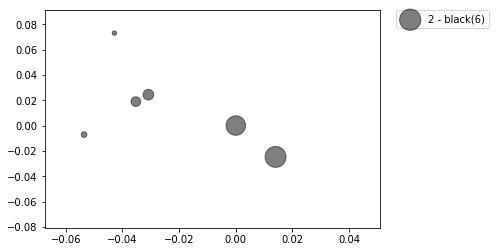

In [39]:
clusters = {
        #0: 'lightblue',
        #1: 'red',
        3: 'black',
        #8: 'pink',
        10: 'green',

        18: 'orange',
        20: 'brown',

    };
plot_clusters(df, {
        #0: 'lightblue',
        #1: 'red',
        2: 'black',
        #3: 'pink',
        #8: 'green',
        #6: 'orange',
        #9: 'brown',

    })

#plot_clustering(df)

In [ ]:
clusters = {
        #0: 'lightblue',
        #1: 'red',
        3: 'black',
        #8: 'pink',
        #10: 'green',

        #18: 'orange',
        #20: 'brown',

    };
columns =['0','1','name']
print (columns)
query = build_cluster_query(clusters)
plot_df_1 = filter_df(agg_df,query, columns )

result = AggClustering(plot_df_1[['0','1']].as_matrix(), 10)
r = result['complete']
plot_df_1['cluster']  =  r[2]

#plot_clustering_df(plot_df_1, label, clusters)

print (plot_df_1.cluster.value_counts())
clusters = {
        5: 'black',
        1: 'green',
        6: 'orange',
        #7: 'pink',
        #8: 'green',
        #2: 'blue',        
        3: 'blue',        

    };


plot_clusters(plot_df_1, clusters, ['0', '1', 'cluster'])

In [ ]:
cluster_1 = pd.DataFrame(agg_df.loc[plot_df_1[plot_df_1['cluster'] == 1].name, ])
cluster_1.index = range(len(cluster_1))
cluster_1.head(30).name

In [ ]:
cluster_1[cluster_1.target_name == 'software_license']

In [ ]:
cluster_1[cluster_1.target_name == 'employment']#[23:25]


In [ ]:
cluster_1['1'].value_counts()



In [ ]:
#agg_df
filePath = Utils.DATA_PATH + '000_x.txt'
#spx.to_csv(filePath, header = True, index  = False, doublequote = True, sep = '|', escapechar=' ');

In [ ]:
#spx
#agg_df = agg_df.join(spx)
#agg_df['cluster'].value_counts()
#agg_df
#X = None

In [ ]:
from matplotlib import cm

In [ ]:
plt.get_cmap('flag')

In [71]:
from sklearn.cluster import DBSCAN
X_dbscan = df[['0','1']].as_matrix()
X_dbscan

array([[-5.48727248e-02,  4.77456896e-02],
       [ 9.65644329e-02,  1.87234063e-01],
       [ 5.28011647e-02, -1.98091385e-01],
       [ 5.05567451e-01,  2.25844655e-02],
       [-4.61718792e-02, -2.36920844e-02],
       [ 1.03568975e-01, -1.55007752e-01],
       [-7.01712887e-02,  1.60061269e-02],
       [-1.97452073e-01, -4.84076810e-02],
       [ 9.20687747e-02,  3.10122411e-01],
       [-1.05236555e-01, -1.17577846e-01],
       [ 2.06075429e-02, -1.30319766e-01],
       [-9.72095760e-02, -1.33431715e-01],
       [-1.01516942e-01,  2.06681838e-01],
       [-1.23003803e-01,  3.31467816e-01],
       [-1.96261557e-16, -0.00000000e+00],
       [-3.27776808e-02, -4.64382556e-02],
       [ 7.31014272e-03,  7.62610544e-02],
       [ 9.30262642e-02,  2.98422398e-02],
       [-2.38632174e-01,  1.06082490e-01],
       [ 8.52028577e-02, -3.22500386e-02],
       [ 2.46522575e-02, -1.36882399e-01],
       [ 9.84593795e-02,  6.92646711e-02],
       [-1.92136540e-01, -9.59709126e-02],
       [ 6.

In [80]:
db = DBSCAN( eps=2.0, min_samples=10, n_jobs  = 4).fit(X)

In [81]:
db.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

In [ ]:
agg_df['cluster_dbscan'] = db.labels_
db.core_sample_indices_

In [ ]:
agg_df.cluster_dbscan.value_counts()

In [ ]:
X

In [90]:
from sklearn.cluster import Birch
brc = Birch(branching_factor=10, n_clusters=10, threshold=0.5, compute_labels=True)
brc.fit(X)


Birch(branching_factor=10, compute_labels=True, copy=True, n_clusters=10,
   threshold=0.5)

In [91]:
df['cluster_brc'] = brc.labels_
df.cluster_brc.value_counts()
#root = brc.root_

0    16
9     1
8     1
7     1
6     1
5     1
4     1
3     1
2     1
1     1
Name: cluster_brc, dtype: int64

In [85]:
#agg_df.cluster_brc.value_counts()
root.__dict__

{'threshold': 0.5,
 'branching_factor': 10,
 'is_leaf': False,
 'n_features': 5380,
 'subclusters_': [<sklearn.cluster.birch._CFSubcluster at 0x7fb8e579e470>,
 'init_centroids_': array([[ 1.50275043,  0.98203719, -0.26122225, ..., -0.13478543,
         -0.28856412, -0.12460088],
        [ 3.47985313,  3.14966942, -0.26122225, ..., -0.36102169,
         -0.28856412, -0.21935573],
        [-0.29478882,  0.0629275 ,  0.55121537, ...,  0.0727005 ,
          1.15094075, -0.21935573],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]]),
 'init_sq_norm_': array([ 8100.6163788 ,  6401.62635888,  7718.29352188, 11873.12238908,
         8511.16629006,  5989.05243231,   510.3525628 ,   591.08226572,
            0.        ,     0.    